# Lab 3: fan carts

This is the notebook to solve the Lab 3 exercise.

It introduces PANDAS, a package used to manipulate datasets easily. We'll use it to simply import the data in csv format. 

It also introduces SCIKIT-LEARN, one of the most common and easy to use Machine Learning package. In particular we will use the linear model to calcualte the acceleration of the cart from the data.

In [56]:
import numpy as np
import pandas as pd
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
sns.set()

In [58]:
# import the data
noMass = pd.read_csv('./data/acceleration_no_mass.csv')

In [59]:
# visualize the data
noMass.head()

,Latest: Time (s),Latest: Position (m),Latest: Velocity (m/s),Latest: Acceleration (m/s²)
0,0.05,0.257406,0.117850,0.124851
1,0.10,0.263147,0.122922,0.159983
2,0.15,0.269334,0.131314,0.209914
3,0.20,0.276018,0.144172,0.254259
4,0.25,0.283713,0.158855,0.262481


Let's see how the data looks like:

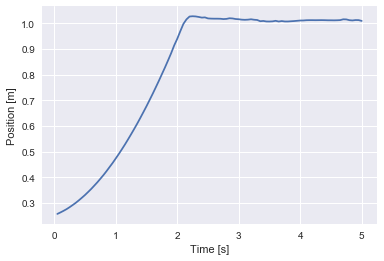

In [60]:
plt.plot(noMass['Latest: Time (s)'].values, noMass['Latest: Position (m)'].values)
plt.xlabel('Time [s]')
plt.ylabel('Position [m]')
plt.show()

Let's remove the tail of the data!! We are not going to fit that to the model.

In [64]:
# these two are the upper and lower bounds for the graph
time_up = 1.8
time_down = 0.15

In [66]:
noMassClean = noMass.loc[(noMass['Latest: Time (s)']<time_up) & (noMass['Latest: Time (s)']>time_down) ]
noMassClean.head()

,Latest: Time (s),Latest: Position (m),Latest: Velocity (m/s),Latest: Acceleration (m/s²)
3,0.20,0.276018,0.144172,0.254259
4,0.25,0.283713,0.158855,0.262481
5,0.30,0.292077,0.170840,0.257243
6,0.35,0.300714,0.183894,0.259661
7,0.40,0.310415,0.197633,0.249136


Let's plot the position:

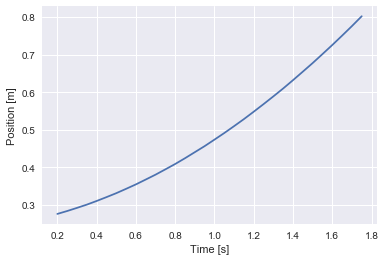

In [67]:
plt.plot(noMassClean['Latest: Time (s)'].values, noMassClean['Latest: Position (m)'].values)
plt.xlabel('Time [s]')
plt.ylabel('Position [m]')
plt.show()

Let's plot the velocity:

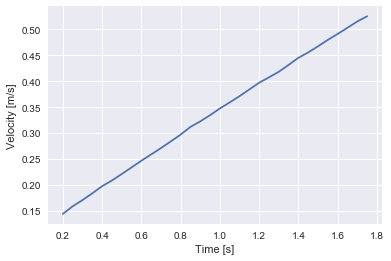

In [68]:
plt.plot(noMassClean['Latest: Time (s)'].values, noMassClean['Latest: Velocity (m/s)'].values)
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.show()

In [69]:
# import the linear model from sklearn
from sklearn import linear_model

In [70]:
# define the regression model
reg = linear_model.LinearRegression()

In [76]:
t = noMassClean['Latest: Time (s)'].values
t2 = t*t

In [86]:
# combine the two data vectors in one single
X = np.stack((t2,t),axis=1)

In [79]:
y = noMassClean['Latest: Position (m)'].values

In [80]:
y = y.reshape(-1,1)

We try the linear model:



Let's use the Scikit Learn linear model to fit the following model

$$
y(t) = A x^2 + B x + C
$$

Lets's fit the data by calling the function fit

In [82]:
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

The coefficient $A$ is stored in the coef_ variable in reg

In [83]:
reg.coef_

array([[ 0.12332654,  0.09929821]])

while the intercept $B$ in the intercept_ variable

In [84]:
reg.intercept_

array([ 0.25092692])

We have 
$$
A = \frac{1}{2}a,
$$
so the acceleration is $a = 2A$

In [85]:
acc_no_mass = 2*reg.coef_[0][0]
print('a:acc_no_mass', acc_no_mass, r'm/s^2 , B:', reg.intercept_[0])

a:acc_no_mass 0.246653079179 m/s^2 , B: 0.250926921188


# Exercise 1.

Try to find the acceleration by fitting another linear model to velocity and time.

$v(t) = A t + B$ 

# Exercise 2.

## 2.1. Importing the data
Here import your data for the cart with the mass using the pandas function read_csv

## 2.2. Cleaning the data
Remove the data-points that you don't use


## 2.3. Find the Acceleration of the Cart.

Use one or more models to find the acceleration of the cart